# Tarea 1


CC5113 - Aprendizaje Automático Bayesiano

Profesor: Pablo Guerrero

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [29]:
# se elimina la primera fila del archivo antes de cargar!
data = np.genfromtxt('data_out_mod.txt', delimiter=' ')
#x = data[:,0]
#y = data[:,1]

np.random.shuffle(data)
training, test = data[:375,:], data[375:,:]

#pdb.set_trace()
#True

### A continuación se grafica la data:

Text(0,0.5,'Y')

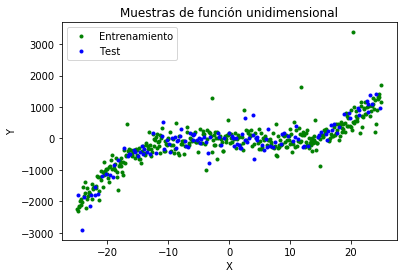

In [30]:
#mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.plot(training[:,0],training[:,1], 'g.')
plt.plot(test[:,0],test[:,1], 'b.')
plt.title("Muestras de función unidimensional")
plt.legend(["Entrenamiento", "Test"])
plt.xlabel("X")
plt.ylabel("Y")

# P1 Regresión Lineal

### Regresión lineal

Sabemos que para la regresión lineal regularizada, los parámetros $\theta$ (parámetros del modelo) tienen la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Para simplificar el problema usaremos un parámetro de regularización $\rho = 0$

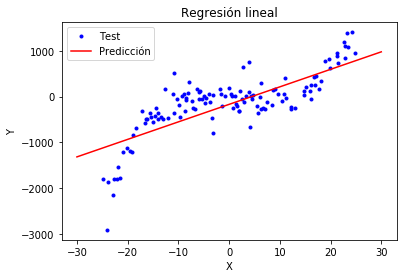

In [31]:
x_tilda = np.array([training[:,0], np.ones(len(training[:,0]))]).transpose()
y_reg = training[:,1]
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

x_recta = np.linspace(-30, 30, 10)
plt.figure()
plt.plot(test[:,0],test[:,1], 'b.')
plt.title("Regresión lineal")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(
    x_recta,
    recta(x_recta, rho),
    'r')
plt.legend(["Test", "Predicción"])

### Comparando con polyfit

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [32]:
print("Theta polyfit: ", np.polyfit(training[:,0],training[:,1], 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [  38.26080659 -168.49504831]
Theta formula:  [  38.26080659 -168.49504831]


### Error cuadrático 

In [33]:
def errorCuadratico(x, pred, labels):
    error2 = np.sum(np.power(np.absolute(np.subtract(labels, pred)), 2))
    
    return error2

print("El error cuadratico del train es: " + str(errorCuadratico(training[:,0],recta(training[:,0], rho), training[:,1])))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(test[:,0],recta(test[:,0], rho), test[:,1])))

El error cuadratico del train es: 77519042.47914818

El error cuadratico del test es: 23003572.472945027


# P2 Kernel Regression

### Kernel Polinomial


El error cuadratico del train es: 35314628.205653355

El error cuadratico del test es: 8047436.125892701


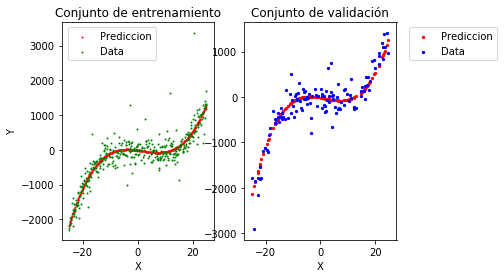

In [34]:
grado = 4

identity_size = grado + 1

x_tilda = np.array([training[:,0], np.ones(len(training[:,0]))]).transpose()
y_reg = training[:,1]

for grado in range(2, grado + 1):
    x_tilda = np.append(np.array(np.power(training[:,0],grado))[np.newaxis].transpose(), x_tilda, axis=1)

identidad = np.identity(identity_size)

def get_theta_pol(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def poly(x, rho): 
    theta = get_theta_pol(rho)
    #print("Theta polyfit: ", np.polyfit(training[:,0],y_reg, grado))
    #print("Theta formula: ", get_theta_pol(rho))
    
    p = np.poly1d(theta)
    return p(x)

#salida = recta(x_te, 0)
#pdb.set_trace()

rho = 0

f, figures = plt.subplots(1, 2)
figures[0].scatter(training[:,0],poly(training[:,0], rho), c ='r', s=1) 
figures[0].scatter(training[:,0],training[:,1], c='g', s=1)
figures[0].set_xlabel("X")
figures[0].set_ylabel("Y")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(test[:,0],poly(test[:,0], rho), c ='r', s=5) 
figures[1].scatter(test[:,0],test[:,1], c='b', s=5) 
figures[1].set_xlabel("X")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(1.05, 1))

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(training[:,0],poly(training[:,0], rho), training[:,1])))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(test[:,0],poly(test[:,0], rho), test[:,1])))

### Kernel Gaussiano


El error cuadratico del train es: 35872165.92681134

El error cuadratico del test es: 8267486.877102245


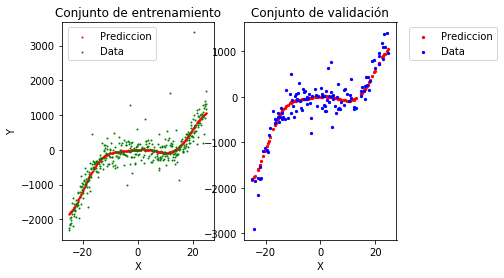

In [35]:
ker_regr = KernelRidge(kernel="rbf", gamma=0.007)

x_train = training[:,0].reshape(-1, 1)
y_train = training[:,1].reshape(-1, 1)

#pdb.set_trace()

x_test = test[:,0].reshape(-1, 1)
y_test = test[:,1].reshape(-1, 1)

#entrenamiento
ker_regr.fit(x_train, y_train)

#prediccicones
ker_pred_cal_train = ker_regr.predict(x_train)
ker_pred_cal_test = ker_regr.predict(x_test)

f, figures = plt.subplots(1, 2)
figures[0].scatter(training[:,0],ker_pred_cal_train, c ='r', s=1) 
figures[0].scatter(training[:,0],training[:,1], c='g', s=1)
figures[0].set_xlabel("X")
figures[0].set_ylabel("Y")
figures[0].set_title("Conjunto de entrenamiento")
figures[0].legend(["Prediccion","Data"], bbox_to_anchor=(0.65, 1))

figures[1].scatter(test[:,0],ker_pred_cal_test, c ='r', s=5) 
figures[1].scatter(test[:,0],test[:,1], c='b', s=5) 
figures[1].set_xlabel("X")
figures[1].set_title("Conjunto de validación")
figures[1].legend(["Prediccion","Data"], bbox_to_anchor=(1.05, 1))

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(x_train,ker_pred_cal_train, y_train)))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(x_test,ker_pred_cal_test, y_test)))

# P3 Multi-Layer Perceptron

In [70]:
red = MLPRegressor(hidden_layer_sizes=(10,), solver='lbfgs')

red.fit(x_train, y_train)

/home/martin/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


El error cuadratico del train es: 35692340.52305496

El error cuadratico del test es: 8381697.394382737


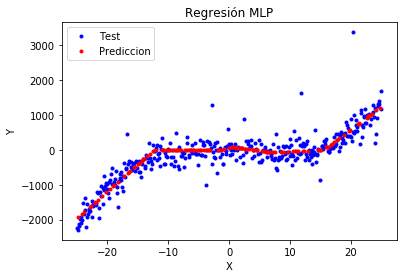

In [71]:
y_pred_train = red.predict(x_train)
y_pred_test = red.predict(x_test)

#pdb.set_trace()
plt.figure()
plt.plot(x_train,y_train, 'b.')
plt.title("Regresión MLP")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(
    x_test,
    y_pred_test,
    'r.')
plt.legend(["Test", "Prediccion"])

print("")
print("El error cuadratico del train es: " + str(errorCuadratico(x_train,y_pred_train.reshape(-1, 1), y_train)))
print("")
print("El error cuadratico del test es: " + str(errorCuadratico(x_test,y_pred_test.reshape(-1, 1), y_test)))